In [6]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vRxp-hsw61ck9cpt5ExZIUhvSGT5zYzoUJl_7xr7YF5qZeazC8393q2taqwkDvMxVirgFDJm1WX3uAC/pub?output=csv")
sample = df.sample(n=50,random_state=42)
female_height = sample.loc[ sample['Gender']=='Female',"Height"]
male_height = sample.loc[ sample['Gender']=='Male',"Height"]
## Getting means for gender height
print(f"For Males (n={len(male_height)}): Mean={np.mean(male_height):.2f}")
print(f"For Females (n={len(female_height)}): Mean={np.mean(female_height):.2f}")

For Males (n=27): Mean=68.90
For Females (n=23): Mean=64.13


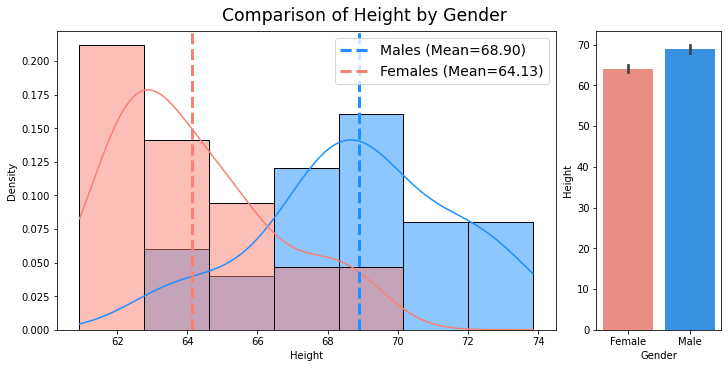

In [7]:
gender_palette={'Male':'dodgerblue', "Female":'salmon'}
## Visualizing Sample means
fig, (ax,ax_bar) = plt.subplots(figsize= (10,5), ncols=2, 
                                constrained_layout=True,
                                gridspec_kw={'width_ratios':[0.8,0.2]})


# Histogram
ax = sns.histplot(data=sample, x='Height',fill=True,hue='Gender',kde=True,
                  stat='density',common_norm=False,ax=ax,
                  palette=gender_palette)

ax.axvline(np.mean(male_height), ls='--',lw=3, 
           label=f"Males (Mean={np.mean(male_height):.2f})",color=gender_palette['Male'])

ax.axvline(np.mean(female_height), ls='--', lw=3, 
           label=f"Females (Mean={np.mean(female_height):.2f})",color=gender_palette['Female'])

ax.legend(prop={"size":14}, loc='upper right')#bbox_to_anchor=[1,1])
## Barplot
sns.barplot(data=sample, x='Gender',y='Height',ax = ax_bar,palette=gender_palette)
fig.suptitle('Comparison of Height by Gender',fontsize='xx-large');

In [8]:
zscores_f = stats.zscore(female_height)
outliers_f = abs(zscores_f)>3
np.sum(outliers_f)

0

In [9]:
zscores_m = stats.zscore(male_height)
outliers_m = abs(zscores_m)>3
np.sum(outliers_m)

0

In [10]:
# normal test males
result_m = stats.normaltest(male_height)
result_m

NormaltestResult(statistic=0.33615904712566513, pvalue=0.8452866118088072)

In [11]:
# normal test females
result_f = stats.normaltest(female_height)
result_f

NormaltestResult(statistic=2.8307141616584417, pvalue=0.2428388848547339)

In [12]:
result = stats.levene(female_height, male_height)
result

LeveneResult(statistic=0.4550154927872889, pvalue=0.5031988559709122)

In [13]:
## Final t-test, after confirming we meet the assumptions
result = stats.ttest_ind(female_height,male_height)
result

Ttest_indResult(statistic=-6.700593917991493, pvalue=2.1170736038110527e-08)

In [14]:
## is our result significant
print(f"p-value={result.pvalue:.10f}")
print(f"Significant: {result.pvalue <.05}")

p-value=0.0000000212
Significant: True
